In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
X = np.array([[1, 1, 1, 1, 1,
               1, 1, 1, 1, 1],
              [1, 1, 2, 1, 3, 
               0, 5, 10, 1, 2]])

In [3]:
X

array([[ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1],
       [ 1,  1,  2,  1,  3,  0,  5, 10,  1,  2]])

In [4]:
X.shape

(2, 10)

In [5]:
y = [45, 55, 50, 59, 65,
    35, 75, 80, 50, 60]

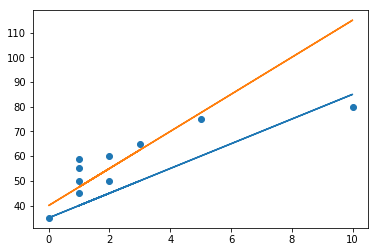

In [6]:
plt.scatter(X[1], y)
plt.plot(X[1], 35*np.ones(10) + X[1]*5)
plt.plot(X[1], 40*np.ones(10) + X[1]*7.5)

In [7]:
y_pred1 = 35*np.ones(10) + X[1]*5
y_pred2 = 40*np.ones(10) + X[1]*7.5

In [8]:
y_pred2

array([ 47.5,  47.5,  55. ,  47.5,  62.5,  40. ,  77.5, 115. ,  47.5,
        55. ])

In [9]:
err1 = np.sum(y - y_pred1)
err2 = np.sum(y - y_pred2)

In [10]:
err1, err2

(94.0, -21.0)

In [11]:
mae_1 = np.sum(np.abs(y - y_pred1)) / 10
mae_2 = np.sum(np.abs(y - y_pred2)) / 10

In [12]:
mae_1, mae_2

(10.4, 7.9)

In [13]:
mse_1 = np.mean((y - y_pred1)**2)
mse_2 = np.mean((y - y_pred2)**2)

In [14]:
mse_1, mse_2

(143.6, 151.35)

Метод наименьших квадратов

In [15]:
X.shape

(2, 10)

In [16]:
X.T.shape

(10, 2)

In [17]:
W = np.linalg.inv(np.dot(X, X.T)) @ X @ y
W

array([47.23214286,  3.91071429])

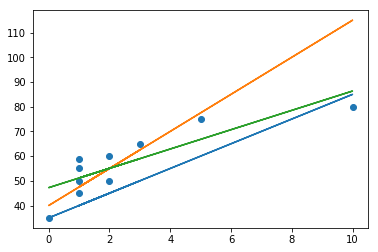

In [18]:
plt.scatter(X[1], y)
plt.plot(X[1], 35*np.ones(10) + X[1]*5)
plt.plot(X[1], 40*np.ones(10) + X[1]*7.5)
plt.plot(X[1], W[0] + W[1] * X[1])

In [19]:
def calc_mse(y, y_pred):
  err = np.mean((y - y_pred)**2)
  return err

In [20]:
calc_mse(y, y_pred1)

143.6

In [21]:
def calc_mae(y, y_pred):
  err = np.mean(np.abs(y - y_pred))
  return err

In [22]:
calc_mae(y, y_pred1)

10.4

In [23]:
y_pred3 = W[0] + W[1] * X[1]
y_pred3

array([51.14285714, 51.14285714, 55.05357143, 51.14285714, 58.96428571,
       47.23214286, 66.78571429, 86.33928571, 51.14285714, 55.05357143])

In [24]:
calc_mse(y, y_pred3)

45.93750000000002

In [25]:
calc_mae(y, y_pred3)

6.182142857142859

Градиентный спуск

In [26]:
n = 10
f = 1/n * np.sum((y_pred3 - y)**2)

In [27]:
alpha = 1e-8
g = alpha * (1/n * 2 * np.sum(X[0] * (W[0] * X[0] - y)))

In [28]:
W[0] - g


47.2321430605

1. Подберите скорость обучения (alpha) и количество итераций:

In [63]:
n = X.shape[1]
alpha = 1e-2
W = np.array([1, 0.5])
iter = 1500
W, alpha, iter


(array([1. , 0.5]), 0.01, 1500)

In [62]:
for i in range(iter):
    y_pred = np.dot(W, X)
    err = calc_mse(y, y_pred)
    for ii in range(W.shape[0]):
        W[ii] -= alpha * (1/n * 2 * np.sum(X[ii] * (y_pred - y)))
    if i % 100 == 0:
        print(i, W, err)

0 [2.102 3.9  ] 3173.15
100 [31.88770806  6.74418155] 175.19445858001853
200 [41.83683774  4.90699865] 61.9177717428135
300 [45.33508261  4.26102097] 47.913169919666785
400 [46.56511152  4.03388672] 46.181755648107604
500 [46.99760587  3.95402334] 45.96769776787538
600 [47.14967657  3.92594232] 45.941233404700036
700 [47.20314662  3.91606866] 45.93796156758051
800 [47.2219474   3.91259695] 45.93755706443538
900 [47.228558    3.91137626] 45.937507054979434


*2. В этом коде мы избавляемся от итераций по весам, но тут есть ошибка, исправьте ее:

In [87]:
W = np.array([1, 0.5])
alpha = 1e-2
tolerance = 1e-10
i=0

while True:
    y_pred = np.dot(W, X)
    err = calc_mse(y, y_pred)
    for ii in range(W.shape[0]):
        W[ii] -= alpha * (1/n * 2 * np.sum(X[ii] * (y_pred - y)))
    step = (alpha * (1/n * 2 * np.sum(X * (y_pred - y)))) 
    W -= step
    if i % 100 == 0:
        print(i, W, err)
        if abs(step) < tolerance:
            break
    i+=1


0 [6.604 8.402] 3173.15
100 [36.97102707  5.9535831 ] 104.69172950985458
200 [44.50426579  4.45380288] 50.08990350842185
300 [46.50694752  4.05509224] 46.23096746677804
400 [47.03935254  3.94909659] 45.958240555170605
500 [47.18089031  3.92091807] 45.93896582049966
600 [47.21851757  3.91342692] 45.937603595574934
700 [47.22852063  3.91143543] 45.937507321526176
800 [47.2311799  3.910906 ] 45.93750051744243
900 [47.23188686  3.91076525] 45.93750003656978
1000 [47.2320748   3.91072783] 45.93750000258454
1100 [47.23212476  3.91071789] 45.93750000018265
1200 [47.23213805  3.91071524] 45.93750000001292
1300 [47.23214158  3.91071454] 45.937500000000924
1400 [47.23214252  3.91071435] 45.93750000000006
1500 [47.23214277  3.9107143 ] 45.93749999999999
1600 [47.23214283  3.91071429] 45.9375


In [0]:
for i in range(1000):
  y_pred = np.dot(W, X)
  err = calc_mse(y, y_pred)
  '''for ii in range(W.shape[0]):
    W[ii] -= alpha * (1/n * 2 * np.sum(X[ii] * (y_pred - y)))'''
  W -= (alpha * (1/n * 2 * np.sum(X * (y_pred - y))))
  if i % 100 == 0:
    print(i, W, err)

*3: вместо того, чтобы задавать количество итераций, задайте условие остановки алгоритма - когда ошибка за итерацию
начинает изменяться ниже определенного порога (упрощенный аналог параметра tol в линейной регрессии в sklearn).

In [88]:
W = np.array([1, 0.5])
alpha = 1e-2
tolerance = 1e-10
i=0

while True:
    y_pred = np.dot(W, X)
    err = calc_mse(y, y_pred)
    for ii in range(W.shape[0]):
        W[ii] -= alpha * (1/n * 2 * np.sum(X[ii] * (y_pred - y)))
    step = (alpha * (1/n * 2 * np.sum(X * (y_pred - y)))) 
    W -= step
    if i % 100 == 0:
        print(i, W, err)
        if abs(step) < tolerance:
            break
    i+=1

0 [6.604 8.402] 3173.15
100 [36.97102707  5.9535831 ] 104.69172950985458
200 [44.50426579  4.45380288] 50.08990350842185
300 [46.50694752  4.05509224] 46.23096746677804
400 [47.03935254  3.94909659] 45.958240555170605
500 [47.18089031  3.92091807] 45.93896582049966
600 [47.21851757  3.91342692] 45.937603595574934
700 [47.22852063  3.91143543] 45.937507321526176
800 [47.2311799  3.910906 ] 45.93750051744243
900 [47.23188686  3.91076525] 45.93750003656978
1000 [47.2320748   3.91072783] 45.93750000258454
1100 [47.23212476  3.91071789] 45.93750000018265
1200 [47.23213805  3.91071524] 45.93750000001292
1300 [47.23214158  3.91071454] 45.937500000000924
1400 [47.23214252  3.91071435] 45.93750000000006
1500 [47.23214277  3.9107143 ] 45.93749999999999
1600 [47.23214283  3.91071429] 45.9375
